This notebooko demonstrates the basic use of the optical depth class and how to load a model included in the package


notebook found and downloaded at: 
https://github.com/me-manu/ebltable

In [38]:
%matplotlib inline

# Imports

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from ebltable.tau_from_model import OptDepth

# Initiate the class plot an example

The easiest way is to import the attenuation from an EBL model. Available models are:

| EBL model id | Model ref.   | Web link |
|------|------|------|
|   dominguez  | Dominguez et al. (2012) | |
|   dominguez-upper  | Dominguez et al. (2012) | upper uncertainty bound|
|   dominguez-lower  | Dominguez et al. (2012) | lower uncertainty bound|
|   franceschini  | Franceschini et al. (2008) |http://www.astro.unipd.it/background/ |
|   finke | Finke et al. (2012) | http://www.phy.ohiou.edu/~finke/EBL/ |
| kneiske | Kneiske & Dole (2010) | |
| gilmore | Gilmore et al. (2012)	|	fiducial model |
| gilmore-fixed | Gilmore et al. (2012)	|	fixed model |
| inoue | Inuoe et al. (2013)	| http://www.slac.stanford.edu/~yinoue/Download.html |
| inoue-low-pop3 | Inuoe et al. (2013)	| Low pop 3 contribution http://www.slac.stanford.edu/~yinoue/Download.html |
| inoue-up-pop3 | Inuoe et al. (2013)	| High pop 3 contribution http://www.slac.stanford.edu/~yinoue/Download.html |

In [10]:
tau =  OptDepth.readmodel(model = 'dominguez')

Define some redshifts and energies for the interpolation:

In [22]:
z = np.arange(0.1,3.6,0.4)
ETeV = np.logspace(-2,2.5,50)

Calculate the attenuation:

In [23]:
atten = np.exp(-1. * tau.opt_depth(z,ETeV))

### Do the plot

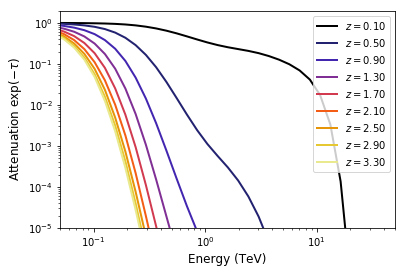

In [31]:
for i,zz in enumerate(z):
    plt.loglog(ETeV,atten[i],
              ls = '-', color = plt.cm.CMRmap(i / float(len(z))),
              label = '$z = {0:.2f}$'.format(zz), lw = 2)

plt.gca().set_ylim((1e-5,2.))
plt.gca().set_xlim((5e-2,5e1))
plt.gca().set_xlabel('Energy (TeV)',size = 'large')
plt.gca().set_ylabel(r'Attenuation $\exp(-\tau)$',size = 'large')
plt.legend(loc = 'upper right')
plt.show()